[The Price of Differential Privacy for Online Learning](https://arxiv.org/pdf/1701.07953.pdf)

In [76]:
import pdb

In [52]:
""" Simulates exp2 online learning algorithm using expert predictions
    
    X - N by T matrix. Each column is the N expert's loss
    learning_rate - 
    mixing_coef - 

"""
def exp2_sim(X, learning_rate, mixing_coef, dist='unif'):
    N, T = X.shape
    q = np.ones(N) / N
    if dist == 'unif':
        mu = np.ones(N) / N
    else:
        raise Exception('Not implemented')
        
    losses = []
    actions = []
    for i in range(T):
        p = (1-mixing_coef) * q + mixing_coef * mu
        play = np.random.choice(N, 1, replace=True, p=p)
        losses.append(X[play, i])
        actions.append(play)
        if p[play] == 0:
            p_inv = 0
        else:
            p_inv = 1.0/p[play]
        l = X[play, i] * p_inv
        #pdb.set_trace()
        q[play] *= np.exp(-l * learning_rate)
        q /= q.sum()
    return losses, actions

In [63]:
#provides epsilon-DP
def private_online_sim(X, eps):
    N, T = X.shape
    lam = 1.0/eps
    X += np.random.laplace(0, lam, size=X.shape)
    learning_rate = np.sqrt( np.log(N) / (2 * N * T * (1+2 * lam ** 2 * np.log(N * T))) )
    mixing_coef = learning_rate * N * np.sqrt(1 + 2 * lam ** 2 * np.log(N * T))
    return exp2_sim(X, learning_rate, mixing_coef, 'unif')

In [74]:
losses, actions = private_online_sim(X, np.inf)
losses_priv, actions_priv = private_online_sim(X, 1.0)

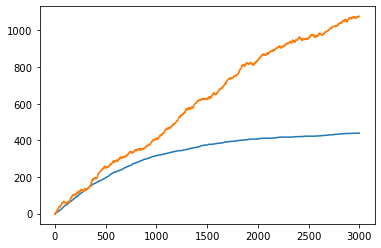

In [75]:
losses = np.array(losses)
losses_priv = np.array(losses_priv)
plt.plot(losses.cumsum())
plt.plot(losses_priv.cumsum())